<a href="https://colab.research.google.com/github/MuhammadNurilHuda/MachineLearningProject/blob/main/Diabetic_Foot_Thermogram_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O Dataset2.zip https://github.com/MuhammadNurilHuda/MachineLearningProject/blob/main/Dataset/Dataset2.zip?raw=true

In [ ]:
import zipfile, os

local_zip = '/content/Dataset2.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('Dataset2')
zip_ref.close()

In [ ]:
pip install split-folders

In [ ]:
import splitfolders

splitfolders.ratio('/content/Dataset2/Dataset', output="Dataset2_split", seed=42, ratio=(.85, .14, .01), group_prefix=None)

Copying files: 334 files [00:00, 7424.33 files/s]


In [ ]:
import os
# base_dir = '/content/Dataset2_split'
base_dir = 'Dataset2_split'

In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
train_positif = os.path.join(train_dir, 'Positif')
train_negatif = os.path.join(train_dir, 'Negatif')

In [ ]:
val_positif = os.path.join(val_dir, 'Positif')
val_negatif = os.path.join(val_dir, 'Negatif')

In [ ]:
test_positif = os.path.join(test_dir, 'Positif')
test_negatif = os.path.join(test_dir, 'Negatif')

In [ ]:
print('total training positif images:', len(os.listdir(train_positif)))
print('total training negatif images:', len(os.listdir(train_negatif)))

total training positif images: 207
total training negatif images: 76


In [ ]:
print('total validation positif images:', len(os.listdir(val_positif)))
print('total validation negatif images:', len(os.listdir(val_negatif)))

total validation positif images: 34
total validation negatif images: 12


In [ ]:
print('total test positif images:', len(os.listdir(test_positif)))
print('total test negatif images:', len(os.listdir(test_negatif)))

total test positif images: 3
total test negatif images: 2


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./225,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(250,250),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(250,250),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=True
)

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(250,250),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=True
)

Found 283 images belonging to 2 classes.
Found 46 images belonging to 2 classes.
Found 5 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop

model1 = Sequential([
                     Conv2D(32, kernel_size=3, activation='relu', input_shape=(250, 250, 1)),
                     MaxPool2D(2,2),

                     Conv2D(64, kernel_size=3, activation='relu'),
                     MaxPool2D(2,2),
                     BatchNormalization(),

                     Conv2D(128, kernel_size=3, activation='relu'),
                     MaxPool2D(2,2),

                     Conv2D(256, kernel_size=3, activation='relu'),
                     MaxPool2D(2,2),

                     Dropout(0.25),

                     Flatten(),

                     Dense(128, activation='relu'),
                     Dense(1, activation='sigmoid')
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 61, 61, 64)       256       
 ormalization)                                                   
                                                        

In [ ]:
model1.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
import time

start=time.time()
history = model1.fit(train_generator,
          epochs=100,
          validation_data=val_generator,
          verbose=1)

Epoch 1/100
9/9 [==============================] - 12s 1s/step - loss: 0.7504 - accuracy: 0.6855 - val_loss: 0.6841 - val_accuracy: 0.7391
Epoch 2/100
9/9 [==============================] - 10s 1s/step - loss: 0.5677 - accuracy: 0.7314 - val_loss: 0.6704 - val_accuracy: 0.7391
Epoch 3/100
9/9 [==============================] - 10s 1s/step - loss: 0.5382 - accuracy: 0.7314 - val_loss: 0.6765 - val_accuracy: 0.7391
Epoch 4/100
9/9 [==============================] - 9s 984ms/step - loss: 0.5305 - accuracy: 0.7314 - val_loss: 0.6730 - val_accuracy: 0.7391
Epoch 5/100
9/9 [==============================] - 9s 1s/step - loss: 0.5084 - accuracy: 0.7314 - val_loss: 0.6675 - val_accuracy: 0.7391
Epoch 6/100
9/9 [==============================] - 10s 1s/step - loss: 0.4898 - accuracy: 0.7420 - val_loss: 0.6664 - val_accuracy: 0.7391
Epoch 7/100
9/9 [==============================] - 11s 1s/step - loss: 0.4757 - accuracy: 0.7350 - val_loss: 0.6643 - val_accuracy: 0.7609
Epoch 8/100
9/9 [=========

In [ ]:
print("waktu = ", time.time() - start, "detik")

waktu =  973.0042953491211 detik


In [ ]:
score = model1.evaluate(train_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

9/9 [==============================] - 3s 270ms/step - loss: 0.1149 - accuracy: 0.9470
Loss: 0.11
Accuracy: 0.95


In [ ]:
score = model1.evaluate(val_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

2/2 [==============================] - 0s 109ms/step - loss: 0.1859 - accuracy: 0.9348
Loss: 0.19
Accuracy: 0.93


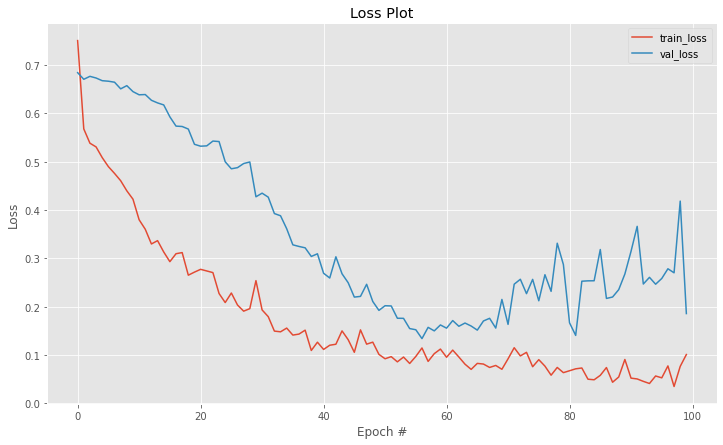

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")
plt.figure(figsize=(12,7))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

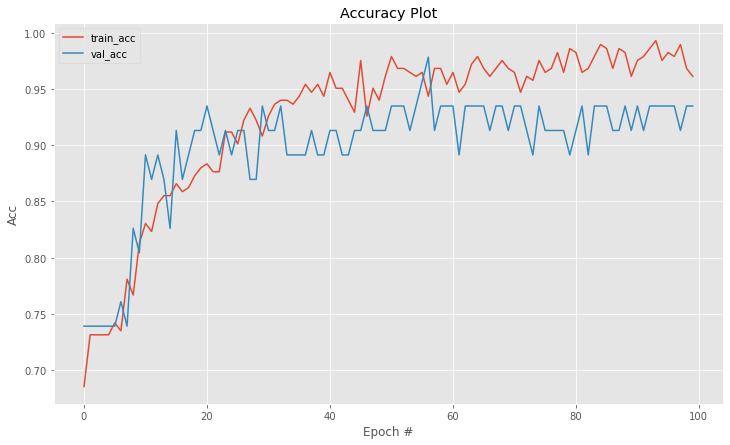

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,7))
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
score = model1.evaluate(test_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

1/1 [==============================] - 0s 80ms/step - loss: 0.0209 - accuracy: 1.0000
Loss: 0.02
Accuracy: 1.00


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np

pred = model1.predict(test_generator)
labels = (pred > 0.5).astype(np.int)

C:\Users\Nuril\AppData\Local\Temp/ipykernel_6320/180543812.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = (pred > 0.5).astype(np.int)


In [ ]:
print(classification_report(test_generator.classes, labels))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [ ]:
model2 = Sequential([
                     Conv2D(32, kernel_size=3, activation='relu', input_shape=(250, 250, 1)),
                     MaxPool2D(2,2),

                     Conv2D(64, kernel_size=3, activation='relu'),
                     MaxPool2D(2,2),
                     BatchNormalization(),

                     Conv2D(128, kernel_size=3, activation='relu'),
                     MaxPool2D(2,2),

                     Dropout(0.5),

                     Flatten(),

                     Dense(64, activation='relu'),
                     Dense(1, activation='sigmoid')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 248, 248, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 124, 124, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       256       
 hNormalization)                                                 
                                                      

In [ ]:
model2.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
start=time.time()
history2 = model2.fit(train_generator,
          epochs=100,
          validation_data=val_generator,
          verbose=1)

Epoch 1/100
9/9 [==============================] - 8s 865ms/step - loss: 0.8446 - accuracy: 0.6714 - val_loss: 0.6905 - val_accuracy: 0.7391
Epoch 2/100
9/9 [==============================] - 8s 863ms/step - loss: 0.5855 - accuracy: 0.7314 - val_loss: 0.6591 - val_accuracy: 0.7391
Epoch 3/100
9/9 [==============================] - 8s 863ms/step - loss: 0.5480 - accuracy: 0.7314 - val_loss: 0.6709 - val_accuracy: 0.7391
Epoch 4/100
9/9 [==============================] - 8s 881ms/step - loss: 0.5227 - accuracy: 0.7314 - val_loss: 0.6695 - val_accuracy: 0.7391
Epoch 5/100
9/9 [==============================] - 8s 865ms/step - loss: 0.4942 - accuracy: 0.7314 - val_loss: 0.6620 - val_accuracy: 0.7391
Epoch 6/100
9/9 [==============================] - 8s 901ms/step - loss: 0.4744 - accuracy: 0.7314 - val_loss: 0.6579 - val_accuracy: 0.7391
Epoch 7/100
9/9 [==============================] - 8s 895ms/step - loss: 0.4649 - accuracy: 0.7279 - val_loss: 0.6557 - val_accuracy: 0.7391
Epoch 8/100
9

In [ ]:
print("waktu = ", time.time() - start, "detik")

waktu =  818.5845282077789 detik


In [ ]:
score = model2.evaluate(train_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

9/9 [==============================] - 2s 246ms/step - loss: 0.0967 - accuracy: 0.9682
Loss: 0.10
Accuracy: 0.97


In [ ]:
score = model2.evaluate(val_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

2/2 [==============================] - 0s 88ms/step - loss: 0.1547 - accuracy: 0.9348
Loss: 0.15
Accuracy: 0.93


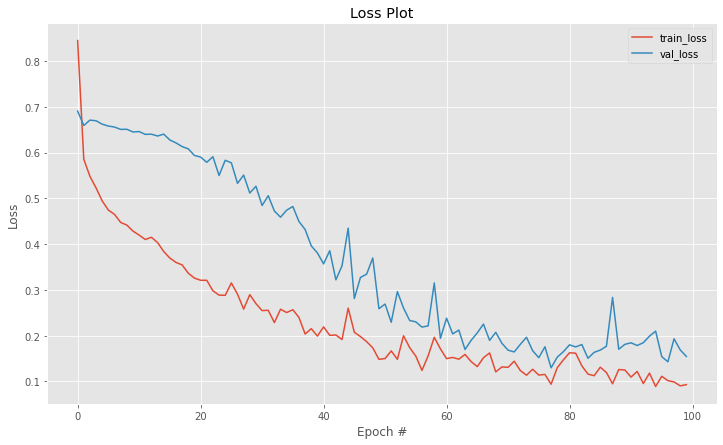

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,7))
plt.plot(history2.history["loss"], label="train_loss")
plt.plot(history2.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

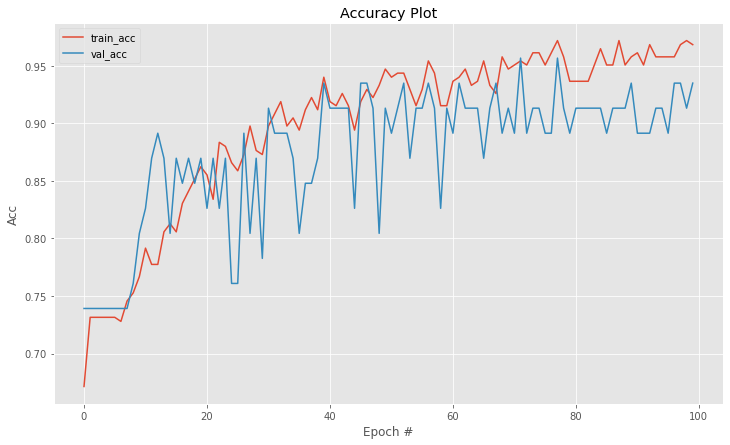

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,7))
plt.plot(history2.history["accuracy"], label="train_acc")
plt.plot(history2.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
score = model2.evaluate(test_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

1/1 [==============================] - 0s 87ms/step - loss: 0.1930 - accuracy: 0.8000
Loss: 0.19
Accuracy: 0.80


In [ ]:
pred2 = model2.predict(test_generator)
labels = (pred2 > 0.5).astype(np.int)

C:\Users\Nuril\AppData\Local\Temp/ipykernel_6320/1658450924.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = (pred2 > 0.5).astype(np.int)


In [ ]:
print(classification_report(test_generator.classes, labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.67      0.57         3

    accuracy                           0.40         5
   macro avg       0.25      0.33      0.29         5
weighted avg       0.30      0.40      0.34         5



In [ ]:
# model1.save("model1_diabet.h5")
# model2.save("model2_diabet.h5")

In [ ]:
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp

In [ ]:
%load_ext tensorboard

In [ ]:
!rm -rf ./logs/ 

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([32,64,128]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.2, 0.5))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'rmsprop', 'adadelta']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [ ]:
# xvl, yvl = zip(*(val_generator[i] for i in range(len(val_generator))))
# x_val, y_val = np.vstack(xvl), np.vstack(yvl)

In [ ]:
def train_test_model(hparams):
    model_hparams = Sequential([
                     Conv2D(32, kernel_size=3, activation='relu', input_shape=(250, 250, 1)),
                     MaxPool2D(2,2),

                     Conv2D(64, kernel_size=3, activation='relu'),
                     MaxPool2D(2,2),
                     BatchNormalization(),

                     Conv2D(128, kernel_size=3, activation='relu'),
                     MaxPool2D(2,2),

                     Dropout(hparams[HP_DROPOUT]),

                     Flatten(),

                     Dense(hparams[HP_NUM_UNITS], activation='relu'),
                     Dense(1, activation='sigmoid')
                     ])
    
    model_hparams.compile(optimizer=hparams[HP_OPTIMIZER], loss='binary_crossentropy', metrics=['accuracy'])

    model_hparams.fit(train_generator, epochs=20, validation_data=val_generator, verbose=1)

    _, accuracy = model_hparams.evaluate(val_generator)
    return accuracy

In [ ]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=50)

In [ ]:
['adam', 'sgd', 'adadelta', 'rmsprop', 'adamx', 'nadam']

['adam', 'sgd', 'adadelta', 'rmsprop', 'adamx', 'nadam']

In [ ]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
    for optimizer in HP_OPTIMIZER.domain.values:
      hparams = {
          HP_NUM_UNITS: num_units,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1


--- Starting trial: run-0
{'num_units': 32, 'dropout': 0.2, 'optimizer': 'adadelta'}
Epoch 1/20
9/9 [==============================] - 9s 898ms/step - loss: 0.6431 - accuracy: 0.6254 - val_loss: 0.6915 - val_accuracy: 0.5870
Epoch 2/20
9/9 [==============================] - 8s 869ms/step - loss: 0.6024 - accuracy: 0.7314 - val_loss: 0.6846 - val_accuracy: 0.7174
Epoch 3/20
9/9 [==============================] - 8s 901ms/step - loss: 0.5920 - accuracy: 0.7279 - val_loss: 0.6814 - val_accuracy: 0.7391
Epoch 4/20
9/9 [==============================] - 8s 864ms/step - loss: 0.5823 - accuracy: 0.7314 - val_loss: 0.6797 - val_accuracy: 0.7391
Epoch 5/20
9/9 [==============================] - 8s 873ms/step - loss: 0.5765 - accuracy: 0.7279 - val_loss: 0.6784 - val_accuracy: 0.7391
Epoch 6/20
9/9 [==============================] - 8s 872ms/step - loss: 0.5720 - accuracy: 0.7279 - val_loss: 0.6774 - val_accuracy: 0.7391
Epoch 7/20
9/9 [==============================] - 8s 862ms/step - loss: 0.5

In [ ]:
import zipfile

hparams_demo_logs = zipfile.ZipFile('hparams_demo_logs.zip', 'r')
hparams_demo_logs.extractall('logs/hparam_demo.zip')

hparams_demo_logs.close()

In [ ]:
%tensorboard --logdir logs/hparam_tuning

Reusing TensorBoard on port 6006 (pid 3516), started 0:01:10 ago. (Use '!kill 3516' to kill it.)